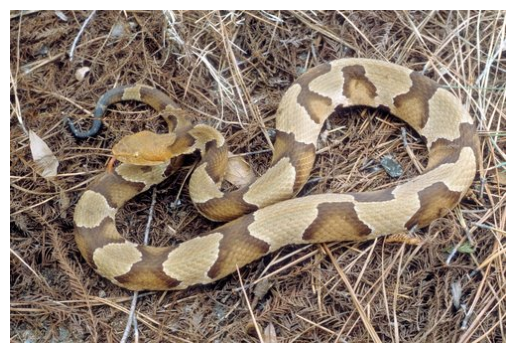

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image file
image_path = "data/raw/agkistrodon_contortrix-912622/563735.jpg"

# Display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

In [2]:
from groundingdino.util.inference import load_model, load_image, predict


c:\users\lesli\documents\duke\masters\aipi540\aipi540-module1\notebooks\dino\groundingdino\groundingdino\models\GroundingDINO\ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")


In [3]:
import os
device = "cpu"
HOME = os.getcwd()
#HOME = os.path.dirname(HOME)
# Construct the path using os.path.join
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")

print(CONFIG_PATH)
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "GroundingDINO", "weights", WEIGHTS_NAME)


c:\Users\lesli\Documents\Duke\Masters\AIPI540\aipi540-module1\GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py


In [4]:
model = load_model(CONFIG_PATH, WEIGHTS_PATH, device=device)
GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "GroundingDINO", "weights", WEIGHTS_NAME)
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

TEXT_PROMPT = "snake"
BOX_TRESHOLD = 0.25
TEXT_TRESHOLD = 0.25

c:\Users\lesli\anaconda3\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
c:\Users\lesli\Documents\Duke\Masters\AIPI540\aipi540-module1\GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
c:\Users\lesli\Documents\Duke\Masters\AIPI540\aipi540-module1\GroundingDINO\weights\groundingdino_swint_ogc.pth ; exist: True


In [5]:
import time
start_time = time.time()
image_source, image_np_tensor = load_image(image_path)

boxes, logits, phrases = predict(
    model=model,
    image=image_np_tensor,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device = device
)
end_time = time.time()


c:\Users\lesli\anaconda3\Lib\site-packages\transformers\modeling_utils.py:995: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
c:\Users\lesli\anaconda3\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
c:\Users\lesli\anaconda3\Lib\site-packages\torch\utils\checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


In [6]:
import numpy as np
import torch
from torchvision.ops import box_convert

def crop_image(image_source: np.ndarray, boxes: torch.Tensor, logits: torch.Tensor) -> np.ndarray:
    max_index = torch.argmax(logits)

    h, w, _ = image_source.shape
    box = boxes[max_index] * torch.Tensor([w, h, w, h])
    xyxy = box_convert(boxes=box.unsqueeze(0), in_fmt="cxcywh", out_fmt="xyxy").numpy()

    xmin, ymin, xmax, ymax = xyxy.squeeze().astype(int)
    cropped_image = image_source[ymin:ymax, xmin:xmax]

    return cropped_image

cropped_image = crop_image(image_source, boxes, logits)

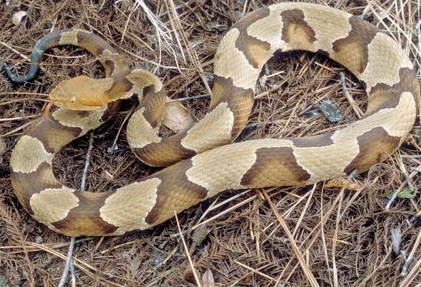

In [7]:
from PIL import Image
Image.fromarray(cropped_image)

In [8]:
from scripts.inference.predict import Predictor


In [9]:

predictor = Predictor()

In [10]:
vals = predictor.predict(cropped_image)

c:\Users\lesli\anaconda3\Lib\site-packages\torchvision\transforms\functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:212.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [11]:
vals

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0]

In [24]:
import sys
sys.path.append(r'C:\Users\lesli\Documents\Duke\Masters\AIPI540\aipi540-module1\utils')

import class_mapping

preds = predictor.predict(cropped_image)

for i, c in enumerate(class_mapping.map_classes()):
    if preds[i] == 1:
        print(f"{c}")


Thamnophis Sirtalis
